# Importing the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Extracting the data

In [2]:
data = pd.read_csv('D:/KNN_Projects/bangalore_house_price_prediction.csv')

In [3]:
data.head(2)

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(7120, 108)

In [5]:
print(data.columns)

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=108)


# Preprocessing the Data

In [6]:
df = data.copy()

In [7]:
df

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.00,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.00,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.00,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.00,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.00,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7115,3.0,2.0,325.00,2900.0,3,11206.896552,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7116,3.0,1.0,84.83,1780.0,3,4765.730337,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7117,2.0,1.0,48.00,880.0,2,5454.545455,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7118,2.0,1.0,55.00,1000.0,2,5500.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.isna().sum()

bath                           0
balcony                        0
price                          0
total_sqft_int                 0
bhk                            0
                              ..
location_Hosur Road            0
location_Horamavu Banaswadi    0
location_Domlur                0
location_Mahadevpura           0
location_Tumkur Road           0
Length: 108, dtype: int64

In [9]:
# No null values

# Pattern Analysis/EDA

In [10]:
df.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
bath,1.000000,0.283192,0.523941,0.653435,0.882461,0.350497,-0.118940,0.030143,0.161243,0.022495,...,-0.010388,-0.019047,-0.015385,0.002339,0.049603,0.011201,-0.020635,0.006606,-0.017608,-0.002474
balcony,0.283192,1.000000,0.138946,0.200648,0.269511,0.068018,0.120220,-0.048382,-0.138809,0.117337,...,0.027585,-0.015110,-0.018297,0.022038,0.024569,-0.020262,0.022541,0.000445,0.008764,-0.018788
price,0.523941,0.138946,1.000000,0.797955,0.497817,0.717821,-0.114594,-0.014613,0.229543,0.012542,...,-0.015052,-0.023919,-0.017011,0.019606,0.045599,0.000618,-0.021200,0.019573,-0.015800,-0.006216
total_sqft_int,0.653435,0.200648,0.797955,1.000000,0.647485,0.376673,-0.133719,0.014041,0.219383,0.009710,...,-0.012294,-0.021914,-0.016353,0.003619,0.037007,0.007224,-0.015287,0.007875,-0.011000,-0.010931
bhk,0.882461,0.269511,0.497817,0.647485,1.000000,0.323285,-0.142496,0.044187,0.178557,0.043887,...,-0.009725,-0.021754,-0.011599,-0.002366,0.043803,0.016102,-0.026186,0.005351,-0.010418,0.008504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
location_Hosur Road,0.011201,-0.020262,0.000618,0.007224,0.016102,0.001412,0.001408,0.001151,-0.003231,-0.036076,...,-0.003028,-0.003028,-0.002958,-0.002958,-0.002958,1.000000,-0.002887,-0.002887,-0.002887,-0.002887
location_Horamavu Banaswadi,-0.020635,0.022541,-0.021200,-0.015287,-0.026186,-0.037227,0.024451,-0.018187,-0.013638,0.027142,...,-0.002955,-0.002955,-0.002887,-0.002887,-0.002887,-0.002887,1.000000,-0.002817,-0.002817,-0.002817
location_Domlur,0.006606,0.000445,0.019573,0.007875,0.005351,0.054259,0.006048,0.002433,-0.013638,0.020595,...,-0.002955,-0.002955,-0.002887,-0.002887,-0.002887,-0.002887,-0.002817,1.000000,-0.002817,-0.002817
location_Mahadevpura,-0.017608,0.008764,-0.015800,-0.011000,-0.010418,-0.023633,0.030585,-0.025060,-0.013638,0.027142,...,-0.002955,-0.002955,-0.002887,-0.002887,-0.002887,-0.002887,-0.002817,-0.002817,1.000000,-0.002817


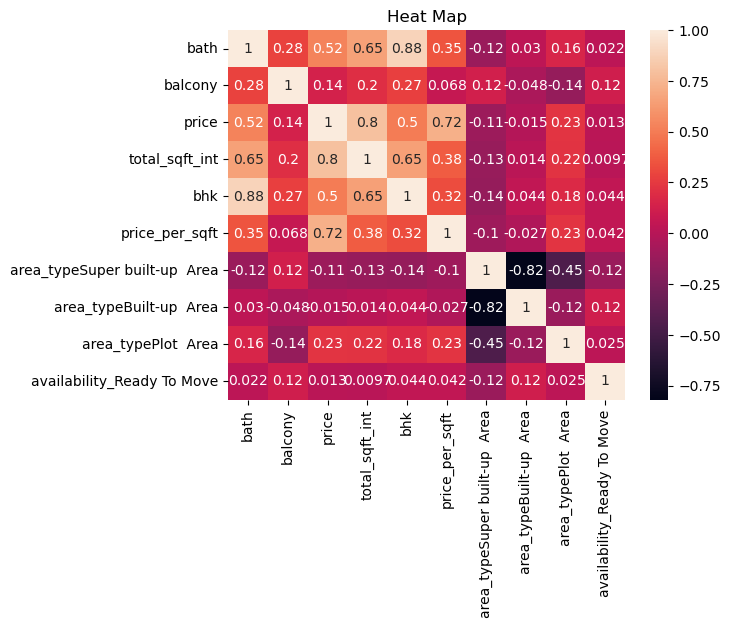

In [11]:
path = 'D:/KNN_Projects'
file_path = os.path.join(path, 'Heat_map.png')
cor = df[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']].corr()
sns.heatmap(cor, annot=True)
plt.title('Heat Map')
plt.savefig(file_path)
plt.show()

In [12]:
# Heat map shows the correlation between the variables

# Model Planning

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
lr = LinearRegression()

In [14]:
ex = ['price_per_sqft']
x = df.drop(columns=ex)
x

,bath,balcony,price,total_sqft_int,bhk,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.00,1672.0,3,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.00,1750.0,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.00,1750.0,3,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.00,1250.0,2,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.00,1200.0,2,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7115,3.0,2.0,325.00,2900.0,3,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7116,3.0,1.0,84.83,1780.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7117,2.0,1.0,48.00,880.0,2,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7118,2.0,1.0,55.00,1000.0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
y = df['price_per_sqft']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=1234)

In [17]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5696, 107), (5696,), (1424, 107), (1424,))

In [18]:
model = lr.fit(x_train, y_train)

In [19]:
pred = model.predict(x_test)

In [20]:
df1 = pd.DataFrame(pred, columns=['Predicted'])

In [21]:
df1['Actual'] = y_test.values

In [22]:
df1

,Predicted,Actual
0,4938.777938,4760.749863
1,5895.924649,6666.666667
2,2906.511656,2800.000000
3,5858.337119,5733.944954
4,5127.349831,4696.132597
...,...,...
1419,24543.748306,23719.165085
1420,4910.265183,4840.017065
1421,6324.911770,7361.268403
1422,7102.981914,8957.654723


In [23]:
r2 = round(r2_score(df1['Actual'], df1['Predicted']), 4)
print(f'The Strength of the model is {r2}')
rmse = sqrt(mean_squared_error(df1['Actual'], df1['Predicted']))
print(f'The RMSE score of this model is {rmse}')

The Strength of the model is 0.7758
The RMSE score of this model is 1187.942036220871


In [24]:
# Model got the accuracy of 77.58% in Linear Regression